<a href="https://colab.research.google.com/github/Abdul8189/datascience/blob/main/linear_regression(lasso%2Cridge).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
dataset =pd.read_csv(r'kc_house_data.csv')
dataset.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0


In [ ]:
dataset.shape


(21613, 19)

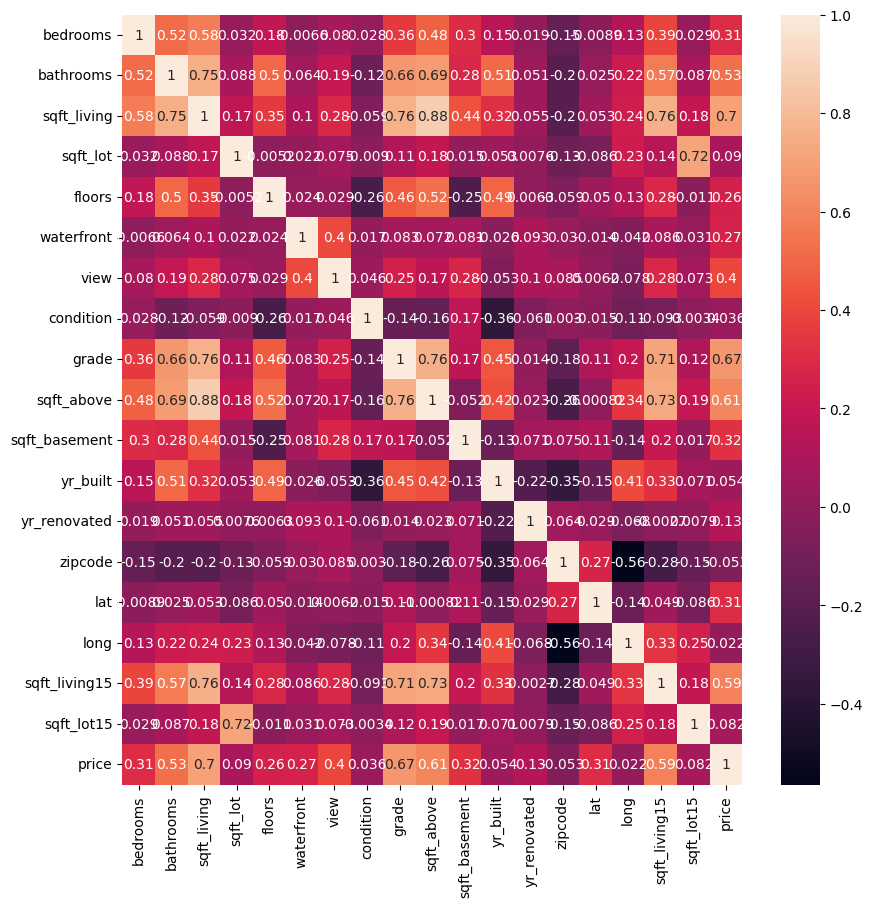

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

In [ ]:
x=dataset.iloc[:,:-1]
y=dataset['price']

In [ ]:
sc=StandardScaler()
sc.fit(x)
sc.transform(x)

array([[-0.39873715, -1.44746357, -0.97983502, ..., -0.30607896,
        -0.9433552 , -0.26071541],
       [-0.39873715,  0.1756067 ,  0.53363434, ..., -0.74634143,
        -0.43268619, -0.18786773],
       [-1.47395936, -1.44746357, -1.42625404, ..., -0.13565477,
         1.07013975, -0.17237524],
       ...,
       [-1.47395936, -1.77207762, -1.15404732, ..., -0.60432128,
        -1.41025258, -0.39414129],
       [-0.39873715,  0.50022075, -0.52252773, ...,  1.02891048,
        -0.8412214 , -0.42051149],
       [-1.47395936, -1.77207762, -1.15404732, ..., -0.60432128,
        -1.41025258, -0.41794772]])

In [ ]:
X=pd.DataFrame(sc.transform(x),columns=x.columns)

In [ ]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,1.870152,-0.352572,-0.306079,-0.943355,-0.260715
1,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,0.879568,1.161568,-0.746341,-0.432686,-0.187868
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,-0.933388,1.283537,-0.135655,1.070140,-0.172375
3,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,1.085160,-0.283288,-1.271816,-0.914174,-0.284522
4,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,-0.073636,0.409550,1.199335,-0.272190,-0.192849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.398737,0.500221,-0.598746,-0.337424,2.788439,-0.087173,-0.305759,-0.629187,0.291916,-0.312039,-0.658681,1.293542,-0.210128,0.468382,1.004958,-0.938069,-0.666135,-0.412381
21609,0.676485,0.500221,0.250539,-0.224386,0.936506,-0.087173,-0.305759,-0.629187,0.291916,0.629908,-0.658681,1.463768,-0.210128,1.272063,-0.356180,-1.051685,-0.228419,-0.203946
21610,-1.473959,-1.772078,-1.154047,-0.332137,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,-0.927928,-0.658681,1.293542,-0.210128,1.234683,0.247888,-0.604321,-1.410253,-0.394141
21611,-0.398737,0.500221,-0.522528,-0.307076,0.936506,-0.087173,-0.305759,-0.629187,0.291916,-0.227505,-0.658681,1.123316,-0.210128,-0.952078,-0.184414,1.028910,-0.841221,-0.420511


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import  LinearRegression,Lasso,Ridge

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr.score(x_test,y_test)*100

70.11994125098217

In [ ]:
lr.coef_

array([-3.43682284e+04,  4.46017474e+04,  1.09085036e+02,  8.87315326e-02,
        6.99030562e+03,  5.62583962e+05,  5.37093292e+04,  2.45472334e+04,
        9.46632425e+04,  7.00744294e+01,  3.90106065e+01, -2.68295647e+03,
        2.04223620e+01, -5.52350423e+02,  5.96031914e+05, -1.94809934e+05,
        2.11958381e+01, -3.25861869e-01])

In [ ]:
x.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

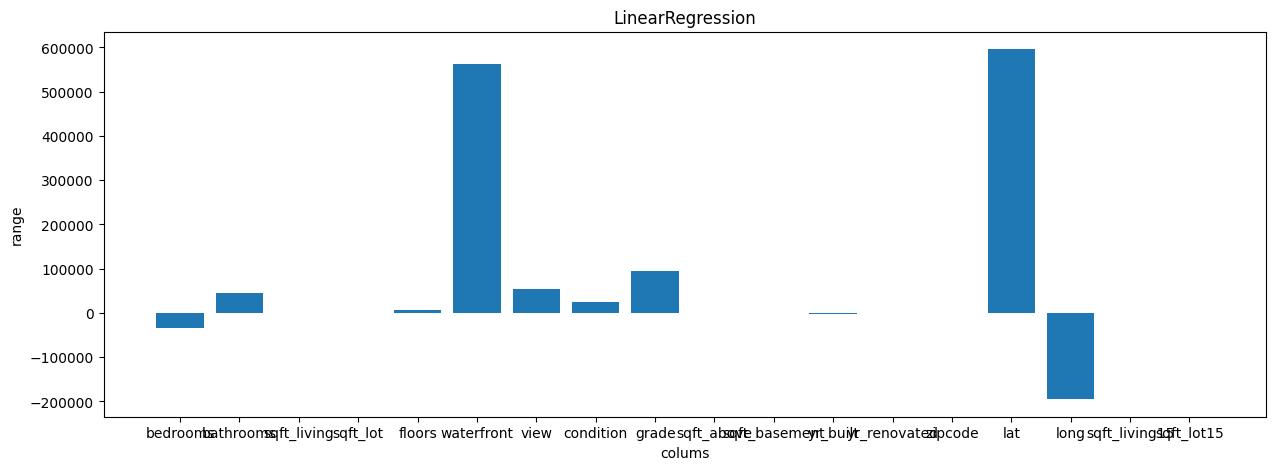

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,lr.coef_)
plt.title('LinearRegression')
plt.xlabel('colums')
plt.ylabel('range')
plt.show()

In [ ]:
# lasso

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
la=Lasso(alpha=10)


In [ ]:
la.fit(x_train,y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.090e+14, tolerance: 2.262e+11
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=10)

In [ ]:
la.score(x_test,y_test)*100

70.11666823311087

In [ ]:
la.coef_

array([-3.43584611e+04,  4.45721209e+04,  2.80609086e+02,  8.83261456e-02,
        6.98285546e+03,  5.61003944e+05,  5.37609417e+04,  2.45113658e+04,
        9.46898685e+04, -1.01445580e+02, -1.32458033e+02, -2.68433491e+03,
        2.04300189e+01, -5.50965530e+02,  5.95379997e+05, -1.93903276e+05,
        2.11633926e+01, -3.26282948e-01])

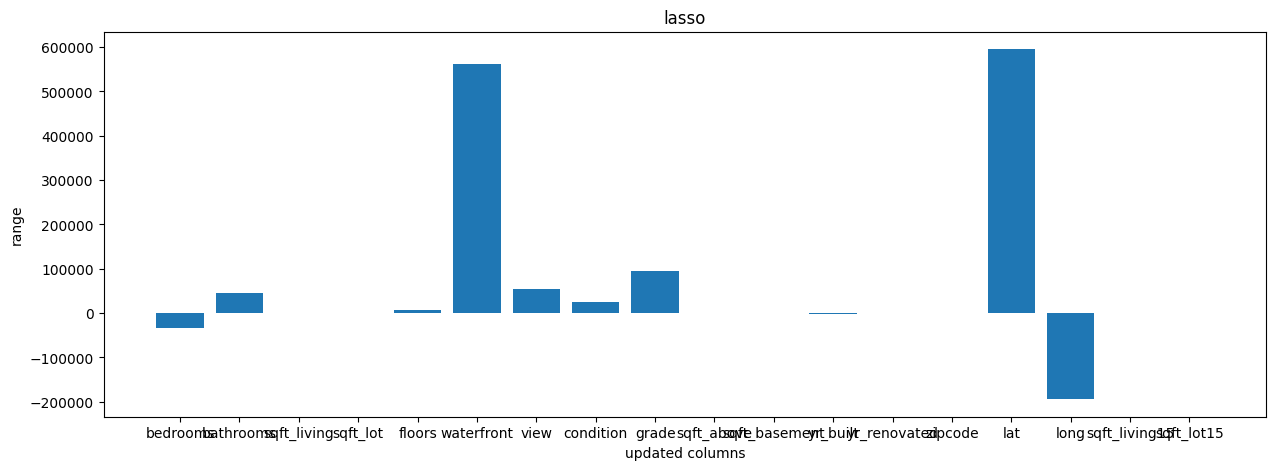

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,la.coef_)
plt.title('lasso')
plt.xlabel('updated columns')
plt.ylabel('range')
plt.show()

In [ ]:
ri=Ridge(alpha=10)

In [ ]:
ri.fit(x_train,y_train)

Ridge(alpha=10)

In [ ]:
ri.score(x_test,y_test)

0.7003031136394782

Text(0, 0.5, 'updated columns')

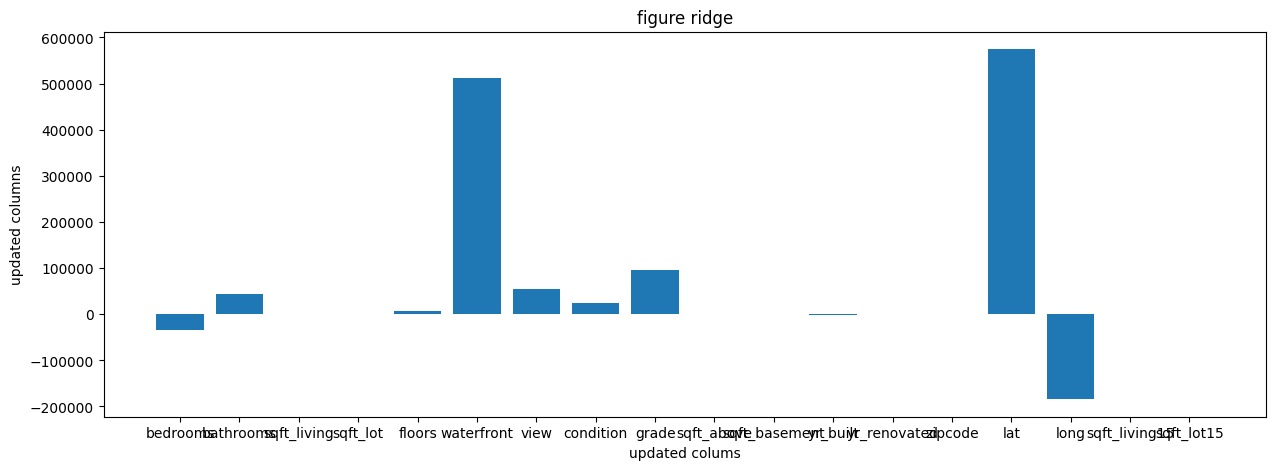

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,ri.coef_)
plt.title('figure ridge')
plt.xlabel('updated colums')
plt.ylabel('updated columns')

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
mean_squared_error(y_test,lr.predict(x_test))


45224874244.72454

In [ ]:
mean_absolute_error(y_test,lr.predict(x_test))

127610.70272607327

In [ ]:
np.sqrt(mean_squared_error(y_test,lr.predict(x_test)))

np.float64(212661.40751138778)

In [ ]:
print(mean_squared_error(y_test,la.predict(x_test)))
print(mean_absolute_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test))))


45229828111.210335
127606.46023445336
212673.05450199923


In [ ]:
print(mean_squared_error(y_test,ri.predict(x_test)))
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ri.predict(x_test))))

45360533294.251366
127576.74580461555
212980.12417653287


In [ ]:
data=pd.DataFrame({'columns':x.columns, 'lasso':la.coef_,'ridge':ri.coef_,'lineanr':lr.coef_})

In [ ]:
data.describe


,columns,lasso,ridge,lineanr
0,bedrooms,-34358.461124,-34717.778617,-34368.228359
1,bathrooms,44572.120864,44733.110723,44601.747432
2,sqft_living,280.609086,109.293074,109.085036
3,sqft_lot,0.088326,0.081746,0.088732
4,floors,6982.855455,7894.682834,6990.305618
5,waterfront,561003.943597,513053.829741,562583.961845
6,view,53760.941709,55536.229889,53709.329173
7,condition,24511.365775,24291.706288,24547.233413
8,grade,94689.868485,95321.094939,94663.242544
9,sqft_above,-101.445580,69.582030,70.074429
